# Collation outputs


- Introduction
- In practice
    - Table: plain text
    - Table: HTML
- An interlude: the JSON format
- Continuing the practice
    - Table: JSON
    - Table: CSV and TSV
    - Table: XML and XML/TEI
    - Exercise 1
    - Graph: SVG
- Exercise 2




## Introduction

In this tutorial we will be trying different outputs for our collation, meaning different graphical representations, formats and visualizations of the result.

The visualization of the collation result is an open discussion: several possibilities have been suggested and used and new ones are always being proposed. When the output of the collation is a printed format, such as a book, it is rare to see anything different from the traditional critical apparatus. Now that output formats are more frequently digital (or at least have a digital component), collation tools tend to offer more than one visualization option, like it is the case for CollateX. The different visualizations are not incompatible; on the contrary, they can be complementary, highlighting different aspects of the result and suitable for different users or different stages of the workflow.



When we introduced CollateX (session 4), we saw a few examples of the alignment table and the graph. The alignment table, in use since the 1960's, is the equivalent of the matrix of bioinformatic for sequence alignment (for example, strings of DNA). In contrast, the graph is meant to represent the fluidity of the text and its variation. The idea of a graph-oriented model for expressing textual variance has been originally developed by Desmond Schmidt [(2008)](http://multiversiondocs.blogspot.it/2008/03/whats-multi-version-document.html). You can refer to [this video](https://vimeo.com/114242362), for a presentation on *Apparatus vs. Graph – an Interface as Scholarly Argument* by Tara Andrews and Joris van Zundert.


CollateX has two main ways to conceive of the collation result: as a **table** (with many different formatting options) and as a **graph**:
- table formats
    - plain text table (no need to specify the output)
    - HTML table (output='**html**')
    - HTML vertical table with colors (output='**html2**')
    - JSON (output='**json**')
    - XML (output='**xml**')
    - XML/TEI (output='**tei**')
- graph format
    - SVG (output='**svg**')

## In practice

Even though we have already encountered some of these outputs, it is worth going through them one more time focussing on part of the code that needs to change to produce the different formats. 



### Table: plain text

In this tutorial we will use a sentence taken from the British and US editions of _Harry Potter and the Philosopher’s Stone_ by J.K. Rowling and the same quote from the film adaptation.

Let’s start with the most simple output, for which we don't need to specify any output format (note that you can name the variable containing the output anything you like, but in this tutorial we call it *alignment_table*, *table* or *graph*)

In the code cell below the lines starting with a hash (#) are comments and are not executed. They are there in this instance to help you remember what the different parts of the code do. You do not need to use them in your notebook (although sometimes it is helpful to add comments to your code so you remember what things do).

In [13]:
#import the collatex library
from collatex import *
#create an instance of the CollateX engine
collation = Collation()
#add witnesses to the CollateX instance
collation.add_plain_witness( "UK", "George reckons he had a bogey-flavoured one once.")
collation.add_plain_witness( "US", "George reckons he had a booger-flavored one once." )
collation.add_plain_witness( "Film", "George sweared he got a bogey-flavoured one once." )
#collate the witnesses and store the result in a variable called 'table'
#as we have not specified an output this will be stored in plain text
table = collate(collation)
#print the collation result
print(table)

+------+--------+---------+----+-----+---+--------+---+-----------+-----------+
| UK   | George | reckons | he | had | a | bogey  | - | flavoured | one once. |
| US   | George | reckons | he | had | a | booger | - | flavored  | one once. |
| Film | George | sweared | he | got | a | bogey  | - | flavoured | one once. |
+------+--------+---------+----+-----+---+--------+---+-----------+-----------+


Specially when there are many witnesses, you might want to create a vertical table instead. For that, you need to add the parameter `layout="vertical"` to the `collate()` function.

In [16]:
table = collate(collation, layout="vertical")
print(table)

+-----------+-----------+-----------+
|     UK    |     US    |    Film   |
+-----------+-----------+-----------+
|   George  |   George  |   George  |
+-----------+-----------+-----------+
|  reckons  |  reckons  |  sweared  |
+-----------+-----------+-----------+
|     he    |     he    |     he    |
+-----------+-----------+-----------+
|    had    |    had    |    got    |
+-----------+-----------+-----------+
|     a     |     a     |     a     |
+-----------+-----------+-----------+
|   bogey   |   booger  |   bogey   |
+-----------+-----------+-----------+
|     -     |     -     |     -     |
+-----------+-----------+-----------+
| flavoured |  flavored | flavoured |
+-----------+-----------+-----------+
| one once. | one once. | one once. |
+-----------+-----------+-----------+


### Table: HTML

Now let's try a different output. This time we still want a table format but instead of it being in plain text we would like it exported in HTML (the markup language used for web pages). To achieve this all you need to do is add the keyword *output* to the *collate* command and give it that value *html*.

In [15]:
table = collate(collation, output="html")

UK,George,reckons,he,had,a,bogey,-,flavoured,one once.
US,George,reckons,he,had,a,booger,-,flavored,one once.
Film,George,sweared,he,got,a,bogey,-,flavoured,one once.


CollateX Python supports two HTML output methods, `html` and `html2`. Unlike the plain text table, which must be printed with a `print()` statement, both HTML formats automatically write their output to the screen inside the Jupyter Notebook interface. These output formats are intended for use only inside Jupyter Notebook, and CollateX Python currently does not expose a method to save them for use elsewhere.

By default the html method, like the ASCII table method, creates a horizontal table. You can create a vertical table adding again the `layout` parameter.



In [17]:
table = collate(collation, output="html", layout="vertical")

UK,US,Film
George,George,George
reckons,reckons,sweared
he,he,he
had,had,got
a,a,a
bogey,booger,bogey
-,-,-
flavoured,flavored,flavoured
one once.,one once.,one once.


The `html2` method produces only vertical output (the layout parameter is ignored) and the output is colorized, which makes it easier to distinguish zones with variation (red background) and those without (cyan).

In [27]:
table = collate(collation, output="html2")

## An interlude: the JSON format


[JavaScript Object Notation (JSON)](https://www.json.org/json-en.html) is a syntax for storing and exchanging data. It is a lightweight data-interchange format and due to its “self-describing” nature, it is easy to understand.

**JSON data** is written as **name/value pairs**. A name/value pair consists of a field name (in double quotes), followed by a colon, followed by a value:

``
"firstName": "Virginia"
``

**JSON objects** are written inside curly braces. A object can contain multiple name/values pairs:

``
{"firstName": "Virginia", "lastName": "Woolf"}
``

**JSON arrays** (ordered lists) are written inside square brackets. Arrays can contain objects.

``
"authors":[
    {"firstName":"Virginia", "lastName":"Woolf"},
    {"firstName":"Toni", "lastName":"Morrison"},
    {"firstName":"Maya", "lastName":"Angelou"}
]

``

JSON is a very flexible format that can be used either as the input or the output of CollateX. A JSON file as a CollateX infput consists of one root object that contains the data of the transcription. This object requires a property called `witnesses` which encloses the different versions we want to collate. The value of this property is an array (a list) of objects in turn, with each object representing a version. The order of the array elements determines the order in which they are processed by the alignment algorithm.

Each object in the witnesses array must have a unique identifier in the required property id. This identifier will be used in the output to reference a particular version. Besides the identifier each object must describe the content of the version. The content can either be specified as a string property named `content`.

``
{
  "witnesses" : [
    {
      "id" : "UK",
      "content" : "George reckons he had a bogey-flavoured one once."
    },
    {
      "id" : "US",
      "content" : "George reckons he had a booger-flavored one once."
    },
    {
      "id" : "Film",
      "content" : "George sweared he got a bogey-flavoured one once."
    }
  ]
}

``

Another option is to provide the content of versions in tokenized (and optionally normalized) form:

``
{
    "witnesses": [
        {
            "id": "UK",
            "tokens": [
                {"t": "George"},
                {"t": "reckons"},
                {"t": "he"},
                {"t": "had"},
                {"t": "a"},
                {"t": "bogey", "n": "booger"},
                {"t": "-"},
                {"t": "flavoured"},
                {"t": "one"},
                {"t": "once"},
                {"t": "."}
            ]
        },
        {
            "id": "US",
            "tokens": [
                {"t": "George"},
                {"t": "reckons"},
                {"t": "he"},
                {"t": "had"},
                {"t": "a"},
                {"t": "booger"},
                {"t": "-"},
                {"t": "flavored", "n": "flavoured"},
                {"t": "one"},
                {"t": "once"},
                {"t": "."}
            ]
        },
                {
            "id": "Film",
            "tokens": [
                {"t": "George"},
                {"t": "swears"},
                {"t": "he"},
                {"t": "had"},
                {"t": "a"},
                {"t": "bogey", "n": "booger"},
                {"t": "-"},
                {"t": "flavoured"},
                {"t": "one"},
                {"t": "once"},
                {"t": "."}
            ]
        }
    ]
}``

When there is the `n` property, it is importance to note that the alignment is done taking into consideration the contents of this property and not those of `t`. In the ecdotic context, we can consider that `t` contains the diplomatic transcription and `n` the normalized form.

## Continuing the practise

### Table: JSON

JSON (Javascript Object Notation) is a format widely used for storing and interchanging data nowadays. In order to produce JSON as output, we need to specify *json* as the output format.

In [20]:
table = collate(collation, output='json')
print(table)

{"table": [[[{"_sigil": "UK", "_token_array_position": 0, "n": "George", "t": "George "}], [{"_sigil": "UK", "_token_array_position": 1, "n": "reckons", "t": "reckons "}], [{"_sigil": "UK", "_token_array_position": 2, "n": "he", "t": "he "}], [{"_sigil": "UK", "_token_array_position": 3, "n": "had", "t": "had "}], [{"_sigil": "UK", "_token_array_position": 4, "n": "a", "t": "a "}], [{"_sigil": "UK", "_token_array_position": 5, "n": "bogey", "t": "bogey"}], [{"_sigil": "UK", "_token_array_position": 6, "n": "-", "t": "-"}], [{"_sigil": "UK", "_token_array_position": 7, "n": "flavoured", "t": "flavoured "}], [{"_sigil": "UK", "_token_array_position": 8, "n": "one", "t": "one "}, {"_sigil": "UK", "_token_array_position": 9, "n": "once", "t": "once"}, {"_sigil": "UK", "_token_array_position": 10, "n": ".", "t": "."}]], [[{"_sigil": "US", "_token_array_position": 12, "n": "George", "t": "George "}], [{"_sigil": "US", "_token_array_position": 13, "n": "reckons", "t": "reckons "}], [{"_sigil"

### Table: CSV and TSV

The output methods `csv` and `tsv` produce comma-separated-value (CSV) and tab-separated-value (TSV) output, respectively, following the layout of the basic plain text table, where each row corresponds to a witness.

In [22]:
table = collate(collation, output='csv')
print(table)

UK,George ,reckons ,he ,had ,a ,bogey,-,flavoured ,one once.
US,George ,reckons ,he ,had ,a ,booger,-,flavored ,one once.
Film,George ,sweared ,he ,got ,a ,bogey,-,flavoured ,one once.



### Table: XML and XML/TEI

We can use the same procedure in order to export the table in XML or XML/TEI (the latter produces a condensed version of the table only listing witnesses at points of divergence - also called a negative apparatus). To do this, we just keep specifying a different output format. Let's start with the XML output (that you can later post-process using XSLT or other tools).

In [19]:
table = collate(collation, output='xml')
print(table)

<root><app><rdg wit="#Film">George </rdg><rdg wit="#UK">George </rdg><rdg wit="#US">George </rdg></app><app><rdg wit="#Film">sweared </rdg><rdg wit="#UK">reckons </rdg><rdg wit="#US">reckons </rdg></app><app><rdg wit="#Film">he </rdg><rdg wit="#UK">he </rdg><rdg wit="#US">he </rdg></app><app><rdg wit="#Film">got </rdg><rdg wit="#UK">had </rdg><rdg wit="#US">had </rdg></app><app><rdg wit="#Film">a </rdg><rdg wit="#UK">a </rdg><rdg wit="#US">a </rdg></app><app><rdg wit="#Film">bogey</rdg><rdg wit="#UK">bogey</rdg><rdg wit="#US">booger</rdg></app><app><rdg wit="#Film">-</rdg><rdg wit="#UK">-</rdg><rdg wit="#US">-</rdg></app><app><rdg wit="#Film">flavoured </rdg><rdg wit="#UK">flavoured </rdg><rdg wit="#US">flavored </rdg></app><app><rdg wit="#Film">one once.</rdg><rdg wit="#UK">one once.</rdg><rdg wit="#US">one once.</rdg></app></root>


And, finally, you can test the XML/TEI output that produces XML following the TEI parallel segmentation encoding guidelines.

In [18]:
table = collate(collation, output='tei')
print(table)

<?xml version="1.0" ?><cx:apparatus xmlns="http://www.tei-c.org/ns/1.0" xmlns:cx="http://interedition.eu/collatex/ns/1.0">George <app><rdg wit="#Film">sweared</rdg><rdg wit="#UK #US">reckons</rdg></app> he <app><rdg wit="#Film">got</rdg><rdg wit="#UK #US">had</rdg></app> a <app><rdg wit="#Film #UK">bogey</rdg><rdg wit="#US">booger</rdg></app>-<app><rdg wit="#Film #UK">flavoured</rdg><rdg wit="#US">flavored</rdg></app> one once.</cx:apparatus>


A more legible output is available by setting the `indent` parameter to `true`, in which case running:

In [23]:
table = collate(collation, output="tei", indent="true")
print(table)

<?xml version="1.0" ?>
<cx:apparatus xmlns="http://www.tei-c.org/ns/1.0" xmlns:cx="http://interedition.eu/collatex/ns/1.0">
	George 
	<app>
		<rdg wit="#Film">sweared</rdg>
		<rdg wit="#UK #US">reckons</rdg>
	</app>
	 
	he 
	<app>
		<rdg wit="#Film">got</rdg>
		<rdg wit="#UK #US">had</rdg>
	</app>
	 
	a 
	<app>
		<rdg wit="#Film #UK">bogey</rdg>
		<rdg wit="#US">booger</rdg>
	</app>
	-
	<app>
		<rdg wit="#Film #UK">flavoured</rdg>
		<rdg wit="#US">flavored</rdg>
	</app>
	 
	one once.
</cx:apparatus>



## Exercise 1

Add the `indent` parameter to the following code so as to generate an indented XML output.

In [24]:
#This is the code you need to modify
table = collate(collation, output="xml")
print(table)

<root><app><rdg wit="#Film">George </rdg><rdg wit="#UK">George </rdg><rdg wit="#US">George </rdg></app><app><rdg wit="#Film">sweared </rdg><rdg wit="#UK">reckons </rdg><rdg wit="#US">reckons </rdg></app><app><rdg wit="#Film">he </rdg><rdg wit="#UK">he </rdg><rdg wit="#US">he </rdg></app><app><rdg wit="#Film">got </rdg><rdg wit="#UK">had </rdg><rdg wit="#US">had </rdg></app><app><rdg wit="#Film">a </rdg><rdg wit="#UK">a </rdg><rdg wit="#US">a </rdg></app><app><rdg wit="#Film">bogey</rdg><rdg wit="#UK">bogey</rdg><rdg wit="#US">booger</rdg></app><app><rdg wit="#Film">-</rdg><rdg wit="#UK">-</rdg><rdg wit="#US">-</rdg></app><app><rdg wit="#Film">flavoured </rdg><rdg wit="#UK">flavoured </rdg><rdg wit="#US">flavored </rdg></app><app><rdg wit="#Film">one once.</rdg><rdg wit="#UK">one once.</rdg><rdg wit="#US">one once.</rdg></app></root>



### Graph: SVG

Two types of SVG output are supported for visualizing the variant graph, `svg_simple` and `svg`. SVG output, like HTML output and unlike the plain text table output, is rendered automatically by the `collate()` function inside the Jupyter Notebook interface. The two SVG output formats are intended for use only inside Jupyter Notebook, and CollateX Python currently does not expose a method to save them for use elsewhere.

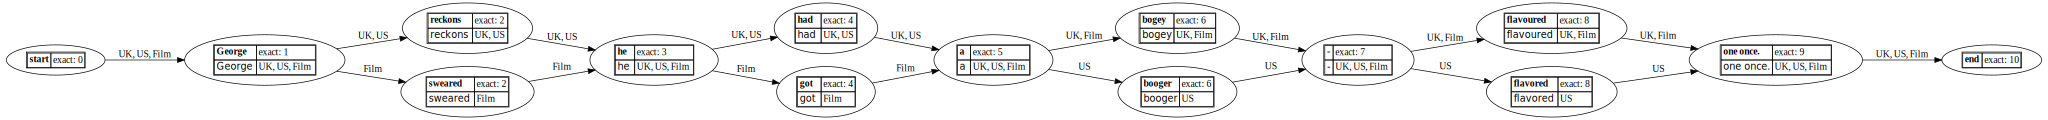

In [25]:
graph = collate(collation, output='svg')

The svg output method outputs a two-column table for each node in the variant graph. The upper left cell contains the `n` (normalized) value of the token and the upper right cell contains the number of witnesses that share that `n` value. Subsequent rows contains the `t` (textual, that is, diplomatic) value in the left column and the sigla of witnesses that attest that `t` value in the right column.

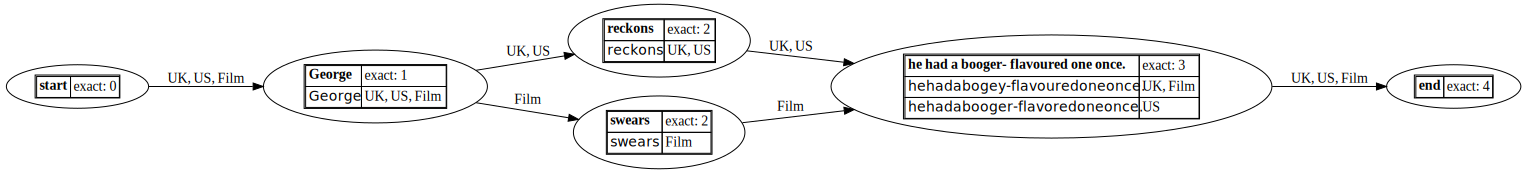

In [33]:
#import the json library
import json
from collatex import *
#create an instance of the CollateX engine
collation = Collation()
#assign to the variable `json_input` a JSON object with the pretokenized and normalized witnesses
json_input = """{ "witnesses": [
        {
            "id": "UK",
            "tokens": [
                {"t": "George"},
                {"t": "reckons"},
                {"t": "he"},
                {"t": "had"},
                {"t": "a"},
                {"t": "bogey", "n": "booger"},
                {"t": "-"},
                {"t": "flavoured"},
                {"t": "one"},
                {"t": "once"},
                {"t": "."}
            ]
        },
        {
            "id": "US",
            "tokens": [
                {"t": "George"},
                {"t": "reckons"},
                {"t": "he"},
                {"t": "had"},
                {"t": "a"},
                {"t": "booger"},
                {"t": "-"},
                {"t": "flavored", "n": "flavoured"},
                {"t": "one"},
                {"t": "once"},
                {"t": "."}
            ]
        },
                {
            "id": "Film",
            "tokens": [
                {"t": "George"},
                {"t": "swears"},
                {"t": "he"},
                {"t": "had"},
                {"t": "a"},
                {"t": "bogey", "n": "booger"},
                {"t": "-"},
                {"t": "flavoured"},
                {"t": "one"},
                {"t": "once"},
                {"t": "."}
            ]
        }
    ]
}"""
#collate the witnesses passing the variable “json_input” as the first argument of the collate() function
#store the result in a variable called 'graph'
graph = collate(json.loads(json_input), output='svg')

The SVG output creates `start` and `end` nodes that mark the beginnings and ends of all witnesses. All three witnesses attest the same readings for “George”, “he” and “a”. The readings diverge with respect to the color: Witness C attests “brown” and Witnesses A and B share an n value of “gray”, but with different t values (“gray” for Witness A and “grey” for Witness B). The edges are labeled accordings to the witnesses; the complete reading of any witness can be reconstructed by following the labeled edges for that witness.

Separate information about `n` and `t` values is most important in cases involving complex custom normalization. For simpler output, the `svg_simple` type renders only the `n` values, and produces:

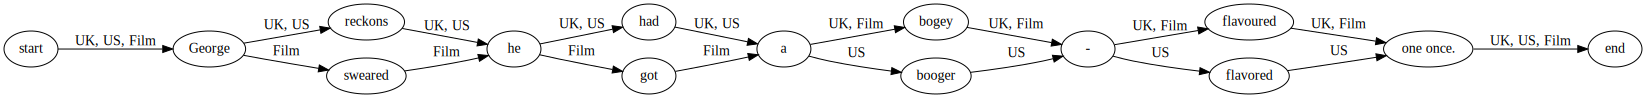

In [34]:
#create an instance of the CollateX engine
collation = Collation()
#add witnesses to the CollateX instance
collation.add_plain_witness( "UK", "George reckons he had a bogey-flavoured one once.")
collation.add_plain_witness( "US", "George reckons he had a booger-flavored one once." )
collation.add_plain_witness( "Film", "George sweared he got a bogey-flavoured one once." )
#collate the witnesses and store the result in a variable called 'graph'
graph = collate(collation, output='svg_simple')


### Supplementary output parameters

#### The `layout` parameter

The `layout` parameter controls whether table output is “horizontal” (which is the default) or “vertical”. It is relevant only for output types `table` and `html`. Otherwise it is ignored: `html2` output is always vertical, and the other output types are not tabular.

#### The `indent` parameter

The `indent` parameter controls whether TEI-XML output is pretty-printed. The default is to serialize the entire XML output in a single line; setting `indent` to any value other than `None` will cause the output to be pretty-printed instead. The `indent` parameter is ignored for all methods except `tei`.

### Summary of output types

In the following table, possible values of the `output` parameter are listed in the left column, and their ability to combine with the `layout`, and `indent` parameters is indicated (“yes” ~ “no”) in the other columns.

`output` | `layout` | `indent`
----|----|----|----|----
**table** | yes | no
**html** |  yes | no
**html2** | no | no
**svg_simple** | no | no
**svg** |  no | no
**xml** | no | no
**tei** | no | yes



## Exercise 2

In this tutorial we have used the _Harry Potter_ example. Now try to produce a JSON or TEI output from the Tolkien’s examples that we've been using in the [previous notebook](). The data are stored in `data/Tolkien`.